In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_json('etsynecklaces10000.json')

In [3]:
len(df)

9967

In [4]:
df=df[df['cur']=='USD']
len(df)

8257

In [5]:
df.head()

cur                                        description  favorites  \
0  USD  [\n    These beautiful high-quality Italian ch...     3737.0   
1  USD  [\n    Name necklace. Silver name necklace. Pe...      248.0   
2  USD  [\n    !!1 SALE !!! WAS $400 - NOW $300 !!! SA...      243.0   
3  USD  [\n    Moonstone Mala Necklace, Moonstone Neck...     1265.0   
4  USD  [\n    Original Filigree Trancelim Double Neck...        NaN   

                                          image_urls  \
0  [https://i.etsystatic.com/9408646/r/il/89302d/...   
1  [https://i.etsystatic.com/7353734/r/il/d16bb4/...   
2  [https://i.etsystatic.com/6500161/r/il/eca1b4/...   
3  [https://i.etsystatic.com/10730572/r/il/4a2401...   
4  [https://i.etsystatic.com/12491321/r/il/a79107...   

                                              images  \
0  [{'url': 'https://i.etsystatic.com/9408646/r/i...   
1  [{'url': 'https://i.etsystatic.com/7353734/r/i...   
2  [{'url': 'https://i.etsystatic.com/6500161/r/i...   
3  [{'url': 'https://i.etsystatic.com/10730572/r/...   
4  [{'url': 'https://i.etsystatic.com/12491321/r/...   

                                            overview   price  \
0  [\n    Handmade item\n, \n    Materials: Solid...   15.00   
1  [\n    Handmade item\n, \n    Material: solid ...   26.00   
2  [\n    Handmade item\n, \n    Chain style: Bea...  300.00   
3  [\n    Handmade item\n, \n    Necklace length:...  176.00   
4  [\n    Handmade item\n, \n    Material: Silver...   84.00   

                                              script  \
0  [\n    {\n    "@type": "Product",\n    "@conte...   
1  [\n    {\n    "@type": "Product",\n    "@conte...   
2  [\n    {\n    "@type": "Product",\n    "@conte...   
3  [\n    {\n    "@type": "Product",\n    "@conte...   
4  [\n    {\n    "@type": "Product",\n    "@conte...   

                                               title  
0  Sterling silver chain Necklace, Mens chain, Cu...  
1  Name necklace. Silver name necklace. Personali...  
2  SALE ! High fasion bead etnic embroidery neckl...  
3  Divine Feminine Moonstone Mala - Beaded Neckla...  
4  Portuguese Filigree NECKLACE Double Trancelim ...

In [54]:
import json
scr_dict = json.loads(df.iloc[0]['script'][0])

In [58]:
scr_dict['aggregateRating']['ratingCount']

573

In [5]:
def text_cleanup(text):
    text = list(set([txt.strip() for txt in text]))
    text = ' '.join(text).strip()
    linkregex = r"((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w\-_]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)"
    text = re.sub(linkregex, '', text)
    text = re.sub(r"[^a-zA-Z\d\s]", '', text)
    text = text.lower()
    return text
    
def remove_stopwords(text, s):
    text = ' '.join([x for x in text.split() if not x in s])
    return text

def remove_numbers(text):
    text = ' '.join([x for x in text.split() if not bool(re.search(r'\d', x))])
    return text

In [6]:
df['price'] = pd.to_numeric(df['price'].apply(lambda x: x.replace(',','')))

In [7]:
len(df[df['price']>500])

269

In [8]:
df = df[df['price']<500]

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


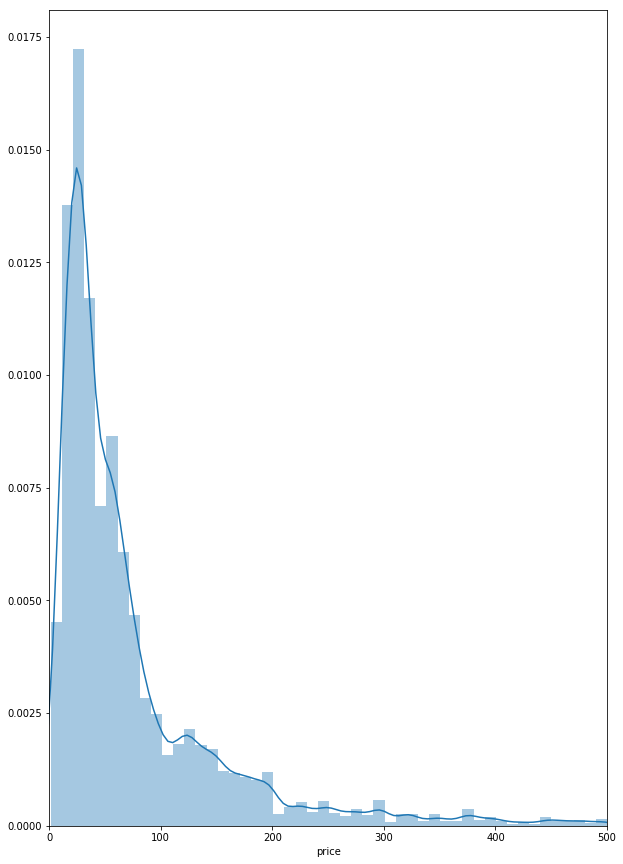

In [9]:
fig, ax =plt.subplots(figsize=(10,15))
ax.set_xlim([0,500])
sns.distplot(df['price'], bins=50,ax=ax)


In [10]:
df['description']=df['description'].apply(lambda x: text_cleanup(x))

In [11]:
s=set(stopwords.words('english'))
df['desc']=df['description'].apply(lambda x: remove_stopwords(x,s))

In [12]:
my_stopwords = ['size','mm','inches','inch','cm','weight','width','length','gpc','weightgpc','grams','must','may','item','items','also','approx','aprox']
df['desc']=df['desc'].apply(lambda x: remove_stopwords(x,my_stopwords))

In [13]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [14]:
df1 = df.drop_duplicates(subset='desc')
len(df1)

6970

In [15]:
df1['adesc'] = df1['desc'].apply(lambda x: remove_numbers(x))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
def remove_2letterwords(text):
    text = ' '.join([x for x in text.split() if len(x)>2])
    return text

In [38]:
df1['adesc'] = df1['adesc'].apply(lambda x: remove_2letterwords(x))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
import collections
uniq_words = [key for key, count in collections.Counter(flatten([[word for word in text.split()] for text in df1['adesc'].values])).items() if count == 1]

In [48]:
def remove_unique_words(text):
    text = ' '.join([x for x in text.split() if not x in uniq_words])
    return text

In [49]:
df1['adesc'] = df1['adesc'].apply(lambda x: remove_unique_words(x))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
df2=df1[df1.price>50]

In [77]:
np.median(df2.price)

93.99

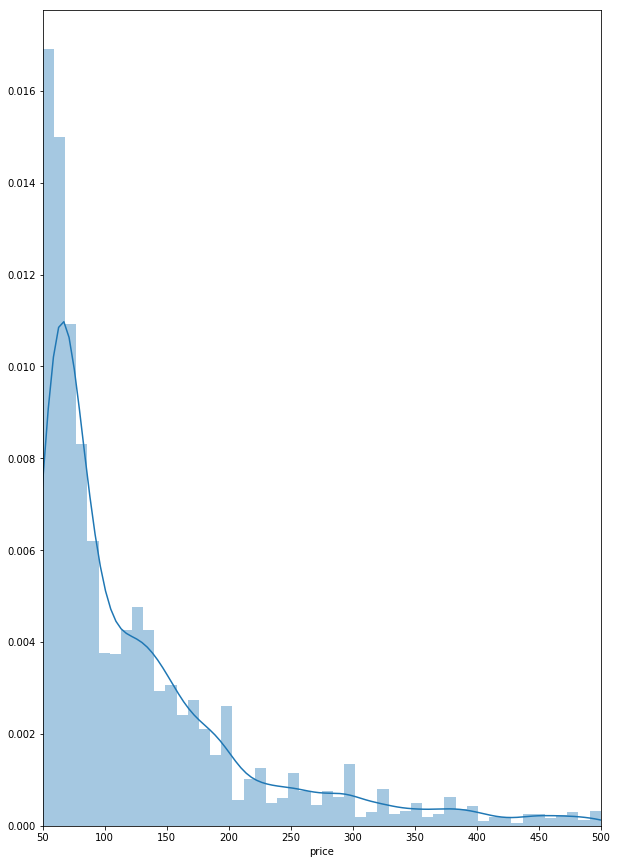

In [76]:
fig, ax =plt.subplots(figsize=(10,15))
ax.set_xlim([50,500])
sns.distplot(df2['price'], bins=50,ax=ax)


In [78]:
# Calculate frequency distribution
fdist = nltk.FreqDist(flatten([x.split() for x in df2['adesc'].values]))

# Output top 50 words

for word, frequency in fdist.most_common(50):
    print(u'{};{}'.format(word, frequency))

necklace;8900
gold;6015
silver;4800
please;4769
jewelry;4624
chain;4397
pendant;3667
gift;3615
sterling;3169
made;2836
order;2244
shipping;2102
piece;1863
one;1735
box;1724
shop;1684
available;1573
days;1560
handmade;1446
beautiful;1372
like;1370
color;1336
note;1310
solid;1308
make;1275
time;1256
hand;1232
love;1226
beads;1225
see;1217
custom;1212
diamond;1197
unique;1187
free;1174
contact;1143
necklaces;1139
checkout;1101
stone;1066
name;1047
quality;1032
back;1003
need;998
perfect;972
check;961
white;961
comes;946
filled;927
inch;920
set;914
long;908


In [ ]:
df['vintage'] = df['overview'].apply(lambda x: int('vintage' in ' '.join(x).lower()))
df['year'] = df['overview'].apply(lambda x: re.findall(r'\d{4}',' '.join(x).lower())[0] if(len(re.findall(r'\d{4}',' '.join(x).lower()))>0) else np.nan)
df['handmade'] = df['overview'].apply(lambda x: int('handmade' in ' '.join(x).lower() or 'hand-made' in ' '.join(x).lower()))

In [39]:
df['materials'].values[0].split()

['solid',
 '925',
 'sterling',
 'silver',
 'italian',
 'chain',
 'if',
 'want',
 'to',
 'customize',
 'this',
 'necklace',
 'with',
 'initials',
 'birthstones',
 'symbolic',
 'charms',
 'please',
 'visit',
 'the',
 'add',
 'on',
 'section',
 'of',
 'the',
 'store',
 'find',
 'the',
 'link',
 'to',
 'it',
 'in',
 'this',
 'listing',
 'all',
 'components',
 'of',
 'these',
 'chains',
 'are',
 'from',
 'italy']

In [48]:
[str(x).split() for x in df['materials'].values]

[['solid',
  '925',
  'sterling',
  'silver',
  'italian',
  'chain',
  'if',
  'want',
  'to',
  'customize',
  'this',
  'necklace',
  'with',
  'initials',
  'birthstones',
  'symbolic',
  'charms',
  'please',
  'visit',
  'the',
  'add',
  'on',
  'section',
  'of',
  'the',
  'store',
  'find',
  'the',
  'link',
  'to',
  'it',
  'in',
  'this',
  'listing',
  'all',
  'components',
  'of',
  'these',
  'chains',
  'are',
  'from',
  'italy'],
 ['solid', 'sterling', 'silver'],
 ['glass',
  'beads',
  'glass',
  'beads',
  'metal',
  'fire',
  'polish',
  'toho',
  'howlite',
  'stones',
  'turquoise',
  'stones',
  'mother',
  'of',
  'pearl',
  'rhinestone',
  'chain',
  'leather',
  'czech',
  'glass',
  'button',
  'brass'],
 ['nan'],
 ['silver'],
 ['stainless', 'steel'],
 ['silver'],
 ['sterling', 'silver', '14', 'k', 'gold', 'filled', 'rose', 'gold', 'filled'],
 ['gold', 'stainless', 'steel'],
 ['gold', 'silver'],
 ['sterling', 'silver', 'silver', 'rolo', 'chain'],
 ['brass

In [51]:
flatten = lambda l: [item for sublist in l for item in sublist]
# Calculate frequency distribution
fdist = nltk.FreqDist(flatten([str(x).split() for x in df['materials'].values]))

# Output top 50 words
for word, frequency in fdist.most_common(20):
    print(u'{};{}'.format(word, frequency))

gold;6015
silver;5138
sterling;2352
chain;1660
rose;1330
filled;1114
14k;1069
nan;1035
plated;925
necklace;805
brass;738
beads;559
white;556
glass;511
gift;488
925;480
hand;451
fill;436
clasp;395
steel;378


In [23]:
def extract_materials(ov):
    l = [re.sub(r"[^a-zA-Z\d\s]", '', x).lower().replace('materials','').replace('material','').strip() for x in ov if 'materials' in x.lower() or 'material' in x.lower()] 
    return l[0] if len(l)>0 else np.nan
    
df['materials'] = df['overview'].apply(extract_materials)

In [ ]:
df['gold'] = df['materials'].apply(lambda x: int('gold' in x.lower()))
df['silver'] = df['materials'].apply(lambda x: int('silver' in x.lower()))
df['diamond'] = df['materials'].apply(lambda x: int('diamond' in x.lower()))
df['brass'] = df['materials'].apply(lambda x: int('brass' in x.lower()))

In [32]:
df['materials'].apply(lambda x: int('gemstone' in x.lower()) if isinstance(x,str) else x).sum()

203.0

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df2['adesc'].values, df2['price'].values, test_size=0.2, random_state=42)

In [80]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import os
import tempfile
TEMP_FOLDER = "/home/eli/code/insight/etsy/etsyitems/nlp"
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

Folder "/home/eli/code/insight/etsy/etsyitems/nlp" will be used to save temporary dictionary and corpus.


In [81]:
X_train.shape

(2692,)

In [82]:
X_test.shape

(673,)

In [83]:
train_texts = [text.split() for text in X_train]

In [84]:
test_texts = [text.split() for text in X_test]

# VECTOR SPACE MODEL #

In [85]:
from sklearn.preprocessing import normalize
def normvec(vec):
    normv = normalize(vec[:,np.newaxis], axis=0).ravel()
    return normv

normvec(np.array([1,1]))

array([0.70710678, 0.70710678])

## TFIDF ##

In [86]:
from gensim import corpora
dictionary = corpora.Dictionary(train_texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'necklacesmed.dict'))  # store the dictionary, for future reference
#dictionary = corpora.dictionary.Dictionary.load(os.path.join(TEMP_FOLDER, 'necklaces.dict'))
print(dictionary)

2019-01-30 17:52:36,675 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-01-30 17:52:37,118 : INFO : built Dictionary(11300 unique tokens: ['arizona', 'beads', 'blend', 'cord', 'cotton']...) from 2692 documents (total 308136 corpus positions)
2019-01-30 17:52:37,120 : INFO : saving Dictionary object under /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmed.dict, separately None
2019-01-30 17:52:37,126 : INFO : saved /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmed.dict


Dictionary(11300 unique tokens: ['arizona', 'beads', 'blend', 'cord', 'cotton']...)


In [87]:
corpus = [dictionary.doc2bow(text) for text in train_texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'necklacesmed.mm'), corpus)
#corpus = corpora.MmCorpus(os.path.join(TEMP_FOLDER, 'necklaces.mm'))

2019-01-30 17:52:50,766 : INFO : storing corpus in Matrix Market format to /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmed.mm
2019-01-30 17:52:50,767 : INFO : saving sparse matrix to /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmed.mm
2019-01-30 17:52:50,768 : INFO : PROGRESS: saving document #0
2019-01-30 17:52:50,910 : INFO : PROGRESS: saving document #1000
2019-01-30 17:52:51,051 : INFO : PROGRESS: saving document #2000
2019-01-30 17:52:51,154 : INFO : saved 2692x11300 matrix, density=0.736% (223794/30419600)
2019-01-30 17:52:51,155 : INFO : saving MmCorpus index to /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmed.mm.index


In [88]:
from gensim import models
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
tfidf.save(os.path.join(TEMP_FOLDER, 'necklacesmedmodel.tfidf'))

2019-01-30 17:53:05,781 : INFO : collecting document frequencies
2019-01-30 17:53:05,783 : INFO : PROGRESS: processing document #0
2019-01-30 17:53:05,850 : INFO : calculating IDF weights for 2692 documents and 11299 features (223794 matrix non-zeros)
2019-01-30 17:53:05,887 : INFO : saving TfidfModel object under /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedmodel.tfidf, separately None
2019-01-30 17:53:05,952 : INFO : saved /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedmodel.tfidf


In [89]:
from gensim import similarities
index = similarities.MatrixSimilarity(tfidf[corpus]) # transform corpus to Tfidf space and index it
index.save(os.path.join(TEMP_FOLDER, 'necklacesmedtfidfsim.index'))

2019-01-30 17:53:10,885 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2019-01-30 17:53:12,288 : INFO : creating matrix with 2692 documents and 11300 features
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2019-01-30 17:53:14,221 : INFO : saving MatrixSimilarity object under /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedtfidfsim.index, separately None
2019-01-30 17:53:14,222 : INFO : storing np array 'index' to /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedtfidfsim.index.index.npy
2019-01-30 17:53:14,327 : INFO : saved /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedtfidfsim.index


In [90]:
corpus_test = [dictionary.doc2bow(text) for text in test_texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'necklacesmedtest.mm'), corpus_test)

2019-01-30 17:53:23,511 : INFO : storing corpus in Matrix Market format to /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedtest.mm
2019-01-30 17:53:23,512 : INFO : saving sparse matrix to /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedtest.mm
2019-01-30 17:53:23,512 : INFO : PROGRESS: saving document #0
2019-01-30 17:53:23,617 : INFO : saved 673x11298 matrix, density=0.743% (56487/7603554)
2019-01-30 17:53:23,618 : INFO : saving MmCorpus index to /home/eli/code/insight/etsy/etsyitems/nlp/necklacesmedtest.mm.index


In [91]:
Xtraintfidf = tfidf[corpus]

In [92]:
Xtesttfidf = tfidf[corpus_test]

## DOC2VEC

In [93]:
import gensim
def read_corpus(texts, tokens_only=False):
    for i, text in enumerate(texts):
        if tokens_only:
            yield gensim.utils.simple_preprocess(' '.join(text))
        else:
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(' '.join(text)), [i])
        

train_corpus = list(read_corpus(train_texts))
test_corpus = list(read_corpus(test_texts, tokens_only=True))

In [94]:
%%time
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

model.build_vocab(train_corpus)

model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
model.save(os.path.join(TEMP_FOLDER, 'necklacesmed.d2v'))

2019-01-30 17:53:41,327 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-01-30 17:53:41,333 : INFO : collecting all words and their counts
2019-01-30 17:53:41,334 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-01-30 17:53:41,423 : INFO : collected 11205 word types and 2692 unique tags from a corpus of 2692 examples and 307715 words
2019-01-30 17:53:41,424 : INFO : Loading a fresh vocabulary
2019-01-30 17:53:41,458 : INFO : effective_min_count=2 retains 9169 unique words (81% of original 11205, drops 2036)
2019-01-30 17:53:41,459 : INFO : effective_min_count=2 leaves 305679 word corpus (99% of original 307715, drops 2036)
2019-01-30 17:53:41,508 : INFO : deleting the raw counts dictionary of 11205 items
2019-01-30 17:53:41,511 : INFO : sample=0.001 downsamples 40 most-common words
2019-01-30 17:53:41,512 : INFO : downsampling leaves estimated 275466 word corpus (90.1% of prior 305679)
2019-01-30 17:53:41,553 : 

2019-01-30 17:53:49,681 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-01-30 17:53:49,687 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-01-30 17:53:49,715 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-01-30 17:53:49,716 : INFO : EPOCH - 18 : training on 307715 raw words (278237 effective words) took 0.4s, 645503 effective words/s
2019-01-30 17:53:50,125 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-01-30 17:53:50,134 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-01-30 17:53:50,148 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-01-30 17:53:50,148 : INFO : EPOCH - 19 : training on 307715 raw words (278102 effective words) took 0.4s, 649365 effective words/s
2019-01-30 17:53:50,536 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-01-30 17:53:50,544 : INFO : worker thread finished; awaiting finish of 1 more threads


2019-01-30 17:53:58,500 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-01-30 17:53:58,509 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-01-30 17:53:58,509 : INFO : EPOCH - 38 : training on 307715 raw words (278098 effective words) took 0.4s, 684294 effective words/s
2019-01-30 17:53:58,901 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-01-30 17:53:58,908 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-01-30 17:53:58,920 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-01-30 17:53:58,920 : INFO : EPOCH - 39 : training on 307715 raw words (278049 effective words) took 0.4s, 682117 effective words/s
2019-01-30 17:53:59,318 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-01-30 17:53:59,321 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-01-30 17:53:59,321 : INFO : worker thread finished; awaiting finish of 0 more threads


CPU times: user 40.5 s, sys: 1.08 s, total: 41.6 s
Wall time: 18.1 s


In [95]:
%time X_tr_d2v = np.array([model.infer_vector(train_corpus[i].words, steps=40, alpha=0.025) for i in range(len(train_corpus))])

%time X_test_d2v = np.array([model.infer_vector(test_corpus[i], steps=40, alpha=0.025) for i in range(len(test_corpus))])

CPU times: user 19.3 s, sys: 0 ns, total: 19.3 s
Wall time: 19.3 s
CPU times: user 4.86 s, sys: 0 ns, total: 4.86 s
Wall time: 4.85 s


# Model fitting and hyperparameter tuning #

In [96]:
def score_r2(y_pred, y_act):
    assert(len(y_pred)==len(y_act))
    resid = y_pred-y_act
    ssresid = np.sum(np.square(resid))
    sstot = np.sum(np.square(y_act-np.mean(y_act)))
    r2 = 1-ssresid/sstot
    return r2

def rmse(y_pred, y_act):
    assert(len(y_pred)==len(y_act))
    return np.sqrt(np.sum(np.square(y_pred-y_act))/len(y_act))

def mape(y_pred, y_act):
    assert(len(y_pred)==len(y_act))
    return 100*np.sum(np.abs((y_pred-y_act)/y_act))/len(y_act)

def adj_r2(y_est,y_act,dfest,dftot):
    assert(len(y_est)==len(y_act))
    resid = y_est-y_act
    ssresid = np.sum(np.square(resid))
    sstot = np.sum(np.square(y_act-np.mean(y_act)))
    r2adj = 1-ssresid*dftot/sstot/dfest
    return r2adj

## kNN regression ##

In [97]:
def knn_predict_tfidf(k, X, y_train, weighting=False):
    y_pred =  np.zeros(len(X))
    for i in range(len(X)):
        sims = sorted(enumerate(index[X[i]]), key=lambda item: -item[1])[:k]
        if weighting:
            weights = np.square(normvec(np.array([v for (k,v) in sims])))
            if np.array_equal(weights,np.zeros(len(weights))):
                weights=None
            y_pred[i] = np.average([y_train[k] for (k,v) in sims], weights=weights)
        else:
            y_pred[i] = np.average([y_train[k] for (k,v) in sims])
        
    return y_pred

In [98]:
def hyperparamcvknn_tfidf(klist, X, y, y_train):
    results = []
    for k in klist:
        for weighting in [True]:
            y_pred = knn_predict_tfidf(k, X, y_train, weighting)
            results.append((adj_r2(y_pred, y, len(y)/k,len(y)-1),[k,weighting]))
            
    return results

In [99]:
y_fit = knn_predict_tfidf(10,Xtraintfidf,y_train,True)
print(adj_r2(y_fit,y_train, len(y_train)/10,len(y_train)-1))

-0.2391188955686343


In [101]:
np.median(y_train)

93.0

In [100]:
rmse(y_fit,y_train)

31.127303545463235

In [102]:
y_pred = knn_predict_tfidf(10,Xtesttfidf,y_train,True)
print(adj_r2(y_pred,y_test, len(y_test)/10,len(y_test)-1))

-5.772336479447639


In [104]:
np.median(y_test)

95.0

In [103]:
rmse(y_pred,y_test)

72.04243442727015

In [105]:
mape(y_fit,y_train)

15.436733230169759

In [106]:
mape(y_pred,y_test)

39.40024621365942

In [ ]:
def score_testdata(X_test,y_test,y_train,params):
    y_pred = knn_predict(params['k'],X_test,y_train,params['weighting'])
    return score_r2(y_pred,y_test)
                   
params = {'k': 10, 'weighting': True}    
print(score_testdata(Xtesttfidf, y_test,y_train,params))

In [ ]:
%%time
def rmse_testdata(X_test,y_test,y_train,params):
    y_pred = knn_predict(params['k'],X_test,y_train,params['weighting'])
    return rmse(y_pred,y_test), y_pred
                   
params = {'k': 10, 'weighting': True}    
rmse_test, y_predix = rmse_testdata(Xtesttfidf, y_test,y_train,params)
print(rmse_test)

In [ ]:
def adj_rsquare(y_pred,y_act,N,k):
    assert(len(y_pred)==len(y_act))
    resid = y_pred-y_act
    ssresid = np.sum(np.square(resid))
    sstot = np.sum(np.square(y_act-np.mean(y_act)))
    dftot = N-1
    dfest = N/k
    r2adj = 1-ssresid*dftot/sstot/dfest
    return r2adj

y_fit = knn_predict(10,Xtraintfidf, y_train,weighting=True)


In [ ]:
adj_rsquare(y_fit,y_train,len(y_train),10)

In [ ]:
mape(y_predix,y_test)

In [ ]:
l=[]
for i in range(10000):
    sample= usdf.sample(n=10, random_state=i)
    l.append(np.mean(sample['price'].values))

In [ ]:
np.random.randint(6000)

In [ ]:
begin = np.random.randint(6000)
rmse(l[begin:(begin+len(y_test))],y_test)

In [ ]:
sns.distplot(l)

In [ ]:
np.median(l)

In [ ]:
def mape_testdata(X_test,y_test,y_train,params):
    y_pred = knn_predict(params['k'],X_test,y_train,params['weighting'])
    return mape(y_pred,y_test)
                   
params = {'k': 10, 'weighting': True}    
print(mape_testdata(Xtesttfidf, y_test,y_train,params))

In [ ]:
X_tr.shape

In [ ]:
y_train.shape

## word2vec knn

In [109]:
def knn_predict_w2v(k, X, y_train, weighting=False):
    y_pred =  np.zeros(len(X))
    for i in range(len(X)):
        #inferred_vector = model.infer_vector(X[i])
        sims = model.docvecs.most_similar([X[i]], topn=k+1)[1:]
        if weighting:
            weights = np.square(normvec(np.array([v for (k,v) in sims])))
            if np.array_equal(weights,np.zeros(len(weights))):
                weights=None
            y_pred[i] = np.average([y_train[k] for (k,v) in sims], weights=weights)
        else:
            y_pred[i] = np.average([y_train[k] for (k,v) in sims])
        
    return y_pred

In [110]:
def hyperparamcvknn_w2v(klist, X, y_act, y_train):
    results = []
    for k in klist:
        for weighting in [True,False]:
            y_pred = knn_predict_w2v(k, X, y_train, weighting)
            results.append((rmse(y_pred, y_act),[k,weighting]))
            
    return results

In [112]:
%%time
klist=[3,5,7,10,15]
w2v_hyperparam = hyperparamcvknn_w2v(klist, X_tr_d2v, y_train, y_train)

2019-01-30 18:07:06,333 : INFO : precomputing L2-norms of doc weight vectors
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anacond

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

CPU times: user 22.9 s, sys: 524 ms, total: 23.4 s
Wall time: 11.6 s


In [113]:
w2v_hyperparam

[(81.10098076798451, [3, True]),
 (82.2092858974602, [3, False]),
 (77.96243443048229, [5, True]),
 (79.03748394296326, [5, False]),
 (77.19496331134954, [7, True]),
 (78.16789258434514, [7, False]),
 (77.23471144721736, [10, True]),
 (78.20137944381116, [10, False]),
 (77.59264340395963, [15, True]),
 (78.55144973272567, [15, False])]

In [115]:
y_pred_d2v = knn_predict_w2v(7,X_test_d2v, y_train,weighting=True)

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWar

In [116]:
rmse(y_pred_d2v,y_test)

78.29635653600269

## Random Forest ##

In [117]:
from sklearn.decomposition import TruncatedSVD
from time import time
# Dimensionality reduction for tfidf
def reduce_dim_by_svd(X, ncomp):
    t0 = time()
    svd = TruncatedSVD(ncomp)
    X_res  = svd.fit_transform(X)
    print("done in %fs" % (time() - t0))
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    print()
    return X_res 

In [118]:
from gensim import matutils
Xtrvec = matutils.corpus2csc(Xtraintfidf).T.toarray()
Xtestvec = matutils.corpus2csc(Xtesttfidf).T.toarray()

In [120]:
X_tr_tfidf = reduce_dim_by_svd(Xtrvec, 100)

done in 1.999454s
Explained variance of the SVD step: 30%



In [121]:
X_tst_tfidf = reduce_dim_by_svd(Xtestvec, 100)

done in 0.669016s
Explained variance of the SVD step: 39%



In [122]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [20, 65, 110, 155, 200]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_tr, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
pd.DataFrame(rf_random.cv_results_).sort_values(by='mean_test_score', ascending=False).iloc[21]['params']

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [123]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, max_features='auto')
regr.fit(X_tr_tfidf,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
print("R2 for training data: %0.2f\n" % regr.score(X_tr_tfidf,y_train))
print("R2 for test data: %0.2f\n" % regr.score(X_tst_tfidf,y_test))

R2 for training data: 0.90

R2 for test data: 0.02



In [125]:
y_pred = regr.predict(X_tst_tfidf)

In [126]:
rmse(y_pred,y_test)

86.55438488275134

In [127]:
adj_r2(y_pred,y_test,X_tst_tfidf.shape[1],len(y_pred)-1)

-5.578925685576677

In [ ]:
best_random = rf_random.best_estimator_
print("R2 for training data: %0.2f\n" % best_random.score(X_tr,y_train))
print("R2 for test data: %0.2f\n" % best_random.score(X_tst,y_test))

In [ ]:
def adj_rsquare_rf(y_pred,y_act,npred):
    assert(len(y_pred)==len(y_act))
    resid = y_pred-y_act
    ssresid = np.sum(np.square(resid))
    sstot = np.sum(np.square(y_act-np.mean(y_act)))
    dftot = len(y_act)-1
    dfest = len(y_act)-npred-1
    r2adj = 1-ssresid*dftot/sstot/dfest
    return r2adj

In [ ]:
pd.DataFrame(rf_random.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [ ]:
y_fit = best_random.predict(X_tr)
adj_rsquare_rf(y_fit,y_train,X_tr.shape[1])

In [ ]:
adj_rsquare_rf(y_pred,y_test,X_tst.shape[1])

In [ ]:
y_pred = best_random.predict(X_tst)

print(rmse(y_pred,y_test))
print(mape(y_pred,y_test))

## XGBoost

In [ ]:
import xgboost as xgb
def get_dmatrix(X, y):
    return xgb.DMatrix(data=X,label=y)

dtrain_matrix = get_dmatrix(X_tr,y_train)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["rmse"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

In [ ]:
xgb_model = xgb.XGBRegressor(**params)

In [ ]:
%%time
knn=10
y_pred = np.zeros(len(testvecs))
for i in range(len(testvecs[:1])):
    sims = sorted(enumerate(index[vec]), key=lambda item: -item[1])[:knn]
    y_pred[i] = np.average([y_train[k] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

In [ ]:
import gensim
trainvecs = tfidf[corpus]
trainvecs = gensim.matutils.corpus2csc(trainvecs)
trainvecs.T.toarray().shape

In [ ]:
y_train

In [ ]:
testvecs = [tfidf[dictionary.doc2bow(doc)] for doc in docs_test]
testvecs = gensim.matutils.corpus2csc(testvecs)
testvecs.T.toarray().shape

In [ ]:
from sklearn import neighbors
n_neighbors = 10


knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_ = knn.fit(trainvecs, y_train).predict(testvecs)


In [ ]:
sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:5]

In [ ]:
np.square(vec_normalize([v for (k,v) in sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:5]]))

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username/password, and connection specifics
username = 'eli'
password = 'elipgsql'     # change this
host     = 'localhost'
port     = '5432'            # default port that postgres listens on
db_name  = 'necklaces_train'

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine( 'postgresql://{}:{}@{}:{}/{}'.format(username, password, host, port, db_name) )
print(engine.url)

In [ ]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

In [ ]:
traindf = pd.DataFrame({'desc' : X_train, 'price' : y_train})

In [ ]:
len(X_train)

In [ ]:
len(traindf)

In [ ]:
traindf.to_sql('necklaces_train',engine, if_exists='replace')

In [ ]:
import psycopg2

In [ ]:
db_name = 'necklaces_train'
username = 'eli'

In [ ]:
sql_query = """
SELECT price FROM necklaces_train WHERE Index IN (%s) 
""" % items

In [ ]:
sql_query

In [ ]:
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database = db_name, host='/var/run/postgresql', user = username)

# query:
items = ', '.join(str(k) for k in l)

sql_query = """
SELECT index, price FROM necklaces_train WHERE index IN (%s) 
""" % items
traindata_from_sql = pd.read_sql_query(sql_query,con)
len(traindata_from_sql)

In [ ]:
traindata_from_sql

In [ ]:
l

In [ ]:
sims

In [ ]:
weights = np.square(vec_normalize([v for (k,v) in sims]))

In [ ]:
traindata_from_sql.head()

In [ ]:
weightindexer for k in traindata_from_sql['index']

In [ ]:
np.average([traindata_from_sql.loc[traindata_from_sql['index']==k, 'price'].values[0] for (k,v) in weightindexer],weights=[v for (k,v) in weightindexer])

In [ ]:
np.average([traindata_from_sql[traindata_from_sql['index']==k, 'price'] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

In [ ]:
weightindexer = list(zip([k for (k,v) in sims],weights))

In [ ]:
np.average(traindata_from_sql['price'].values,weights=np.square(vec_normalize([v for (k,v) in sims])))

In [ ]:
%%time
knn=10
y_pred = np.zeros(len(testvecs))
for i in range(len(testvecs[:1])):
    sims = sorted(enumerate(index[vec]), key=lambda item: -item[1])[:knn]
    y_pred[i] = np.average([y_train[k] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

In [ ]:
y_pred

In [ ]:
l = [k for (k,v) in sorted(enumerate(index[trainvecs[56]]), key=lambda item: -item[1])[1:knn+1]]

In [ ]:
l

In [ ]:

placeholder= '?' # For SQLite. See DBAPI paramstyle.
items = ', '.join(str(k) for k in l)
'SELECT name FROM students WHERE id IN (%s)' % items

In [ ]:
text = 'gold necklace'
doc = text.split()
vec = tfidf[dictionary.doc2bow(doc)]

In [ ]:
sims = sorted(enumerate(index[vec]), key=lambda item: -item[1])[:knn]

In [ ]:
trainvecs = tfidf[corpus]

In [ ]:
%%time
knn = 10
y_fit = np.zeros(len(y_train))
trainvecs = tfidf[corpus]
for i in range(len(trainvecs[:1])):
    sims = sorted(enumerate(index[]), key=lambda item: -item[1])[1:knn+1]
    print(list(sims))
    y_fit[i] = np.average([y_train[k] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

In [ ]:
[y_train[k] for (k,v) in sims]

In [ ]:
np.square(vec_normalize([v for (k,v) in sims]))

In [ ]:
traindata_from_sql['price'].values

In [ ]:
y_fit

In [ ]:
resid = y_fit[~np.isnan(y_fit)]-y_train[~np.isnan(y_fit)]

In [ ]:
len(resid)

In [ ]:
sstot = np.sum(np.square(y_train[~np.isnan(y_fit)]-np.mean(y_train[~np.isnan(y_fit)])))

In [ ]:
ssresid = np.sum(np.square(resid))

In [ ]:
r2 = 1-ssresid/sstot
r2

In [ ]:
rmse = np.sqrt(np.mean(np.square(resid)))
rmse

In [ ]:
(y_test[abs(resid)>1000], y_pred[abs(resid)>1000])

In [ ]:
np.mean(test)

In [ ]:
resid[abs(resid)>1000]

In [ ]:
fig,ax = plt.subplots(figsize=(10,15))
sns.scatterplot(x=y_pred, y=resid, ax=ax)

In [ ]:
np.sort(np.square(y_test-y_pred))

In [ ]:
np.median(y_test)

In [ ]:
np.mean(y_test)

In [ ]:
np.sqrt(np.mean(np.sort(np.square(y_test-y_pred))[:-100]))

In [ ]:
y_test[:10]

In [ ]:
y_train[k] for (k,v) in sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:5]:


In [ ]:
np.mean([y_train[k] for (k,v) in sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:10]])

In [ ]:
y_test[0]

In [ ]:
[sorted(enumerate(index[vec]), key=lambda item: -item[1])[:5] for vec in testvecs[:3]]

In [ ]:
sims = index[testvecs[0]]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims[:10])

In [ ]:
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in X_train:
    for token in text.split():
        frequency[token] += 1

texts = [[token for token in text.split() if frequency[token] > 1] for text in X_train]

from pprint import pprint  # pretty-printer
pprint(texts)

In [ ]:
from nltk.probability import FreqDist

In [ ]:
%%time
fdist = FreqDist(word for word in ' '.join(usdf['desc'].values).split() if not word.isnumeric())

In [ ]:
fdist.pprint(maxlen=20)

In [ ]:
import re
usdf['adesc'] = usdf['desc'].apply(lambda desc: ' '.join([x for x in desc.split() if not bool(re.search(r'\d', x))]))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
descs = usdf['adesc'].values

In [ ]:
vectorizer = TfidfVectorizer()
tfidf =  vectorizer.fit_transform(descs)
feature_names = vectorizer.get_feature_names()
denselist = tfidf.todense().tolist()

In [ ]:
vectorizer.inverse_transform(tfidf)

In [ ]:
usdf[usdf.price>100]

In [ ]:
tfidffeatures = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
s = tfidffeatures.iloc[0]
s[s>0].sort_values(ascending=False)[:10]

In [ ]:
tfidf.shape

In [ ]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfidf)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
%%time
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

In [ ]:
fig, ax =plt.subplots(figsize=(10,5))
ax.set_xlim(0,10000)
usdf.price.hist(ax=ax, bins=50)

In [ ]:
from matplotlib import cm
from matplotlib import colors
norm = cm.colors.Normalize(vmax=usdf.price.values.max(), vmin=usdf.price.values.min())
cmap = cm.jet

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=usdf.price.values, marker="x", cmap=cmap, norm=norm)

In [ ]:
from scipy.cluster import  hierarchy

In [ ]:
#Clustering
X = tfidf.todense()
threshold = 0.1
Z = hierarchy.linkage(X,"average", metric="cosine")
#Clustering
maxclust = 20
C = hierarchy.fcluster(Z, maxclust, criterion="maxclust")
#C = hierarchy.fcluster(Z, threshold, criterion="distance")

In [ ]:
len(C)

In [ ]:
len(np.unique(C))

In [ ]:
usdf['clusters'] = C
usdf.head()

In [ ]:
from nltk import FreqDist

In [ ]:
fdist_hiprice = FreqDist(word for word in ' '.join(usdf[usdf['price']>100]['adesc'].values).split() if not word.isnumeric())
fdist_hiprice.pprint(maxlen=20)

In [ ]:
fig,ax = plt.subplots(figsize=(15,10)) 
plt.sca(ax)
fdist_hiprice.plot(20, cumulative=False)
fig.savefig('disthiprice.png')

In [ ]:
fig,ax = plt.subplots(figsize=(15,10)) 
plt.sca(ax)
fdist_loprice.plot(20,cumulative=False)
fig.savefig('distloprice.png')

In [ ]:
fdist_loprice = FreqDist(word for word in ' '.join(usdf[usdf['price']<25]['desc'].values).split() if not word.isnumeric())
fdist_loprice.pprint(maxlen=20)

In [ ]:
tfidf.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
y = usdf['price'].values

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
regr_rf = RandomForestRegressor(n_estimators=20, max_depth=None,min_samples_split=2, random_state=2, oob_score=True)
regr_rf.fit(X_train, y_train)

In [ ]:
y_rf = regr_rf.predict(X_test)

In [ ]:
X!=tfidf

In [ ]:
regr_rf.score(X_test,y_test)

In [ ]:
regr_rf.oob_score_

In [ ]:
np.sqrt(np.mean(np.square(y_rf-y_test)))

In [ ]:
closeby = np.zeros(len(usdf))
eps = 1.0
for index, row in usdf.iterrows():
    if(index<len(usdf)-2):
        i2 = index+1
        row2=usdf.iloc[i2]
        while(row['clusters']==row2['clusters']):
            #print(row[['price','title']], row2[['price','title']])
            if (np.abs(float(row['price'])-float(row2['price']))<eps):
                closeby[i2]=1
            if(i2<len(usdf)-1): 
                i2+=1
                row2=usdf.iloc[i2]
        

In [ ]:
np.sum(closeby)

In [ ]:
len(C)

In [ ]:
len(np.unique(C))

In [ ]:
len(C)-len(np.unique(C))

In [ ]:
usdf.reset_index(drop=True)

In [ ]:
usdf.groupby('clusters')['price'].std()

### Lets have 20 clusters

In [ ]:
#Clustering
maxclust = 20
C20 = hierarchy.fcluster(Z, maxclust, criterion="maxclust")

In [ ]:
np.unique(C20)

In [ ]:
usdf['c20'] = C20
usdf.head()

In [6]:
df['overview'].apply(lambda x: print(x))

['\n    Handmade item\n', '\n    Materials: Solid 925 Sterling silver Italian chain, If want to Customize this necklace with, initials birthstones symbolic charms, please visit the add on section of the store, find the link to it in this listing, All components of these chains are from Italy\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Material: solid sterling silver\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Chain style: Bead\n', '\n    Materials: glass beads, glass, beads, metal, fire polish, toho, howlite stones, turquoise stones, mother of pearl, rhinestone chain, leather, czech glass button, brass\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Handmade item\n', '\n    Necklace length: 32 Inches\n', '\n    Tassel height: 2.5 Inches\n', '\n    Tassel width: .

['\n    Handmade item\n', '\n    Necklace length: 18 Inches\n', '\n    Material: Wood\n', '\n    Can be personalized: Yes\n', '\n    Closure: Magnetic\n', '\n    Style: Minimalist\n', '\n    Adjustable length: No\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Necklace length: 19 Inches\n', '\n    Chain style: Bead\n', '\n    Materials: Czech seed beads, silver colored magnet clasp\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Necklace length: 28 Inches\n', '\n    Material: Silver\n', '\n    Number of strands: 1\n', '\n    Adjustable length: Yes\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Materials: gumball beads, toggles, rhinestone pendant\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Closure: Lobster claw\n', '\n    Chain style: Bead\n', '\n 

['\n    Handmade item\n', '\n    Material: Gold, Rose gold, Silver\n', '\n    Can be personalized: Yes\n', '\n    Closure: Spring ring\n', '\n    Recycled: No\n', '\n    Chain style: Cable\n', '\n    Number of strands: 1\n', '\n    Adjustable length: Yes\n', '\n    Spinner: No\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Made to order\n', '\n    Favorited by: ', '\n']
['\n    Handmade item\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Necklace length: 18 Inches\n', '\n    Locket width: .75 Inches\n', '\n    Locket height: .75 Inches\n', '\n    Material: Stainless steel\n', '\n    Can be personalized: Yes\n', '\n    Recycled: No\n', '\n    Style: Minimalist\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Material: Aluminum, Silver\n', '\n    Favorited by: ', '\n']
['\n    Hand

['\n    Handmade item\n', '\n    Necklace length: 22 Inches\n', '\n    Bib height: 3 Inches\n', '\n    Material: Ceramic\n', '\n    Can be personalized: No\n', '\n    Recycled: No\n', '\n    Style: Boho & hippie\n', '\n    Number of strands: 1\n', '\n    Adjustable length: No\n', '\n    Spinner: No\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']
['\n    Handmade item\n', '\n    Necklace length: 16 Inches\n', '\n    Material: Brass\n', '\n    Closure: Lobster claw\n', '\n    Recycled: No\n', '\n    Adjustable length: Yes\n', '\n    Spinner: No\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Material: Brass, Copper, Silver\n', '\n    Style: Boho & hippie\n', '\n    Raw stone: Yes\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Material: Copper\n', '\n    Style: Art nouveau\n', '\n    Favorited by: ', '\n'

['\n    Handmade item\n', '\n    Can be personalized: Yes\n', '\n    Closure: Spring ring\n', '\n    Style: Minimalist\n', '\n    Material: Sterling silver\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Materials: memorial urn pendant, ashes pendant, cremation necklace, stainless steel, sterling silver, cremation urn, handwriting, personalized, memorial pendant, Urn, mens memorial jewelry, mens urn cremation jewelry\n', '\n    Made to order\n', '\n    Favorited by: ', '\n', '\n    Gift message available\n']
['\n    Handmade item\n', '\n    Style: 1-B\n', '\n    Pendant height: 1 Inches\n', '\n    Necklace length: 28 Inches\n', '\n    Material: Copper, Stone\n', '\n    Style: Boho & hippie\n', '\n    Favorited by: ', '\n']
['\n    Handmade item\n', '\n    Materials: fine and sterling silver, Click Item Details for more info\n', '\n    Made to order\n', '\n    Favorited by: ', '\n']
['\n    Handmade item\n', '

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
12      None
13      None
14      None
15      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
        ... 
9924    None
9926    None
9928    None
9929    None
9932    None
9933    None
9934    None
9937    None
9938    None
9940    None
9941    None
9943    None
9944    None
9945    None
9946    None
9947    None
9948    None
9950    None
9951    None
9952    None
9955    None
9957    None
9958    None
9960    None
9961    None
9962    None
9963    None
9964    None
9965    None
9966    None
Name: overview, Length: 8257, dtype: object

In [ ]:
'vintage' in ' '.join(['\n    Vintage item\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']).lower()

In [ ]:
import re
re.findall(r'\d{4}',' '.join(['\n    Vintage item \n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']))

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
12      0
13      0
14      0
15      0
17      0
18      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
       ..
9924    0
9926    0
9928    0
9929    1
9932    0
9933    0
9934    0
9937    0
9938    0
9940    0
9941    0
9943    0
9944    1
9945    1
9946    0
9947    0
9948    0
9950    0
9951    0
9952    0
9955    0
9957    0
9958    0
9960    0
9961    0
9962    0
9963    0
9964    0
9965    0
9966    0
Name: overview, Length: 8257, dtype: int64

In [9]:
df['overview'].apply(lambda x: int('handmade' in ' '.join(x).lower() or 'hand-made' in ' '.join(x).lower()))

0       1
1       1
2       1
3       1
4       1
5       1
6       0
7       1
8       1
9       1
10      1
12      1
13      1
14      1
15      1
17      1
18      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      0
29      1
30      1
31      1
32      1
       ..
9924    1
9926    1
9928    1
9929    0
9932    1
9933    1
9934    1
9937    1
9938    1
9940    1
9941    1
9943    1
9944    0
9945    1
9946    1
9947    1
9948    1
9950    1
9951    1
9952    1
9955    1
9957    1
9958    1
9960    1
9961    1
9962    1
9963    1
9964    1
9965    1
9966    1
Name: overview, Length: 8257, dtype: int64

In [ ]:
usdf['handmade'] = usdf['overview'].apply(lambda x: int('handmade' in ' '.join(x).lower() or 'hand-made' in ' '.join(x).lower()))

In [12]:
def extract_materials(ov):
    l = [re.sub(r"[^a-zA-Z\d\s]", '', x).lower().replace('materials','').replace('material','').strip() for x in ov if 'materials' in x.lower() or 'material' in x.lower()] 
    return l[0] if len(l)>0 else np.nan
    

In [20]:
df['overview'].apply(extract_materials)[4]

'silver'

In [ ]:
def extract_materials(ov):
    l = [re.sub(r"[^a-zA-Z\d\s]", '', x).lower().replace('materials','').replace('material','').strip() for x in ov if 'materials' in x.lower() or 'material' in x.lower()] 
    return l[0] if len(l)>0 else np.nan
    
usdf['materials'] = usdf['overview'].apply(extract_materials)

In [ ]:
usdf.columns

In [ ]:
usdf.head()